In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# from https://github.com/solevillar/scGeneFit-python
from scGeneFit.functions import *

# Import data
[X, Y, names]= load_example_data("CITEseq")
N,d=X.shape
print(X.shape, Y.shape)
Y=Y-1 # to start from 0

print('nb classes level 0:',len(np.unique(Y[0])))
#print('nb classes level 1:',len(np.unique(Y[1])))

(8617, 500) (8617,)
nb classes level 0: 1


In [7]:
for i in range(len(np.unique(Y[0]))):
    c= np.sum(Y[0]==i)
    print('class %d: %d' % (i, c))

class 0: 0


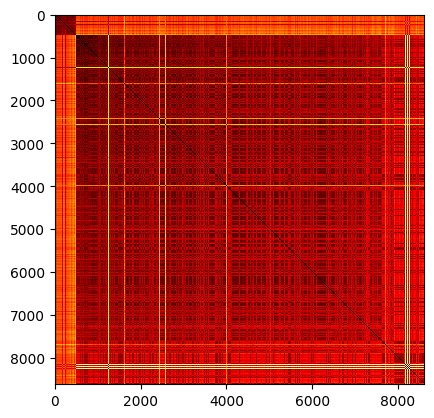

In [8]:
import torch
import torch.nn.functional as F

def cosine_distance_matrix(X):
    X_normalized = F.normalize(X, p=2, dim=1)
    cosine_similarity = torch.mm(X_normalized, X_normalized.t())
    return 1 - cosine_similarity


X_torch = torch.from_numpy(X)
distance = cosine_distance_matrix(X_torch).numpy()
distance[distance < 0] = 0

plt.imshow(distance, cmap='hot', interpolation='nearest')

In [4]:
distance

array([[0.00000000e+00, 1.80877706e-01, 1.48781637e-01, ...,
        4.50204844e-01, 5.44122285e-01, 5.40796413e-01],
       [1.80877706e-01, 0.00000000e+00, 1.61191898e-01, ...,
        4.57937941e-01, 5.31622942e-01, 5.48507672e-01],
       [1.48781637e-01, 1.61191898e-01, 0.00000000e+00, ...,
        4.29102988e-01, 5.19698188e-01, 5.16125470e-01],
       ...,
       [4.50204844e-01, 4.57937941e-01, 4.29102988e-01, ...,
        0.00000000e+00, 5.34059459e-01, 5.79008013e-01],
       [5.44122285e-01, 5.31622942e-01, 5.19698188e-01, ...,
        5.34059459e-01, 3.66373598e-15, 5.44799309e-01],
       [5.40796413e-01, 5.48507672e-01, 5.16125470e-01, ...,
        5.79008013e-01, 5.44799309e-01, 1.11022302e-16]])

In [9]:
import pickle

# Save the distance matrix as a numpy array
with open('/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/datasets/D_cbmc.pkl', 'wb') as f:
    pickle.dump(distance, f)

In [8]:
from sklearn.cluster import AgglomerativeClustering

#clustering = AgglomerativeClustering(metric="cosine",linkage='complete',n_clusters=7).fit(X)
clustering = AgglomerativeClustering(n_clusters=13, metric='precomputed').fit(distance)

labels = clustering.labels_

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(Y, clustering.labels_)
print('Adjusted Rank Index',ari)


ValueError: precomputed was provided as metric. Ward can only work with euclidean distances.

In [ ]:
import openTSNE
tsne = openTSNE.TSNE(perplexity=10,metric="precomputed",random_state=42)
embedding = tsne.fit(distance)

Attempting to use `pca` initalization, but using precomputed distance matrix! Using `spectral` initilization instead, which doesn't need access to the data matrix.


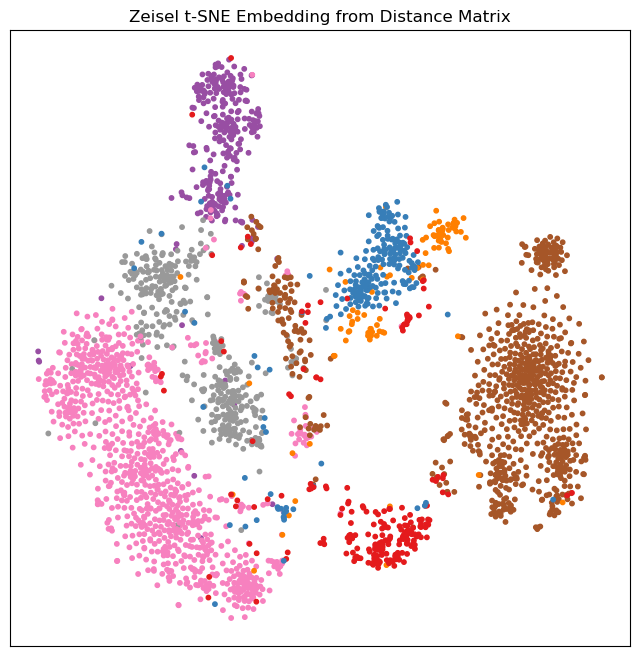

In [ ]:
# Plot the embedding
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1],c=Y[0],s=10,cmap='Set1')
plt.title("Zeisel t-SNE Embedding from Distance Matrix")
plt.xticks([])
plt.yticks([])
plt.show()